# Binary oversampling

This notebook presents the general usecase of the ```smote_variants``` package, namely, the oversampling of binary classification datasets, including the learning of the metric to be used instead of the conventional Euclidean metric.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import smote_variants as sv
import imbalanced_databases as imbd

from sklearn.datasets import make_classification

import logging
logging.getLogger('smote_variants').setLevel(logging.CRITICAL)

## Generating a classification problem

The ```sklearn.datasets.make_classification``` method is used to generate a spectacular dataset.

In [7]:
X, y= make_classification(n_samples=100, 
                            n_features=3,
                            n_informative=2,
                            n_redundant=1,
                            n_repeated=0,
                            n_clusters_per_class=2,
                            weights=np.array([0.8, 0.2]),
                            random_state=7)

## Noise removal with metric learning

We compare the effect of noise removal with and without learning the suitable metric.

In [8]:
noise_filters_metric= [sv.TomekLinkRemoval, sv.NeighborhoodCleaningRule, sv.EditedNearestNeighbors]

/home/gykovacs/anaconda3/envs/smote_variants/lib/python3.10/site-packages/metric_learn/itml.py:35: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  X = np.vstack({tuple(row) for row in pairs.reshape(-1, pairs.shape[2])})


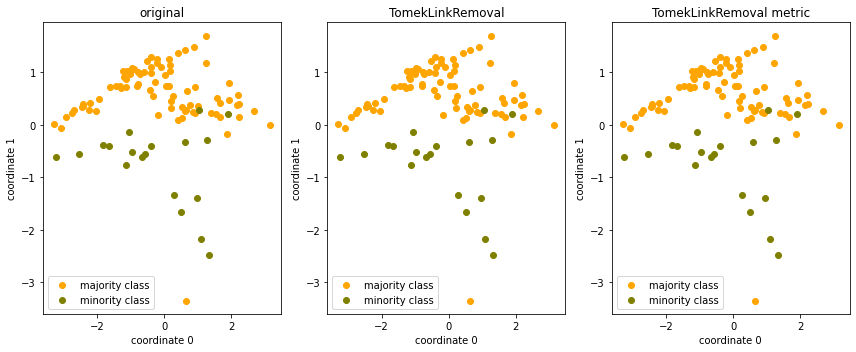

/home/gykovacs/anaconda3/envs/smote_variants/lib/python3.10/site-packages/metric_learn/itml.py:35: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  X = np.vstack({tuple(row) for row in pairs.reshape(-1, pairs.shape[2])})


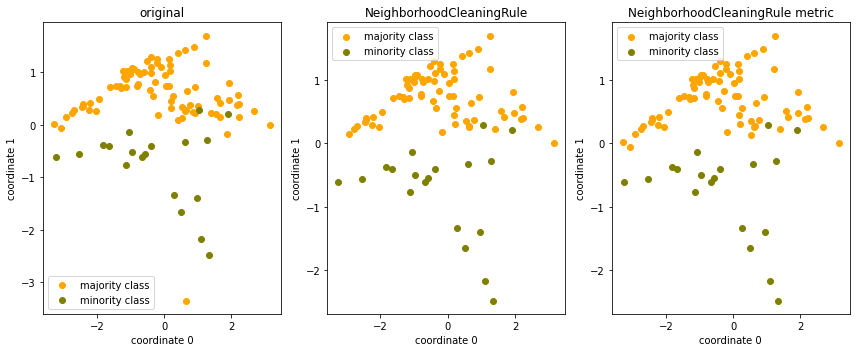

/home/gykovacs/anaconda3/envs/smote_variants/lib/python3.10/site-packages/metric_learn/itml.py:35: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  X = np.vstack({tuple(row) for row in pairs.reshape(-1, pairs.shape[2])})


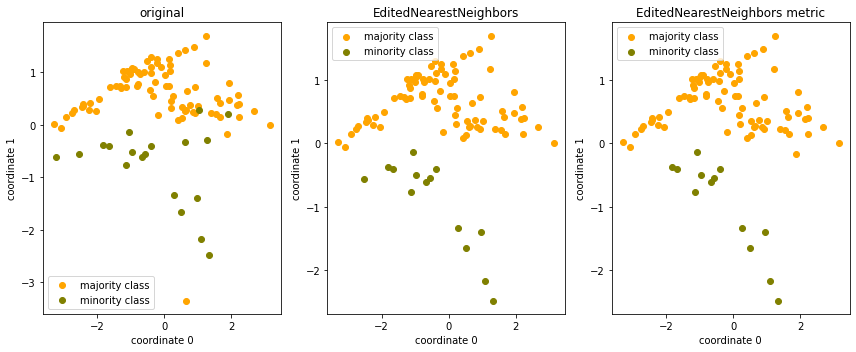

In [9]:
for nf in noise_filters_metric:
    nf_vanilla= nf()
    X_nf, y_nf= nf_vanilla.remove_noise(X, y)

    nf_metric= nf(nn_params={'metric': 'precomputed',
                            'metric_learning': 'ITML'})
    X_nf_metric, y_nf_metric= nf_metric.remove_noise(X, y)

    plt.figure(figsize=(12, 5))
    ax= plt.subplot(131)
    plt.scatter(X[y == 0][:,0], X[y == 0][:,1], label='majority class', c='orange', marker='o')
    plt.scatter(X[y == 1][:,0], X[y == 1][:,1], label='minority class', c='olive', marker='o')
    plt.title('original')
    plt.xlabel('coordinate 0')
    plt.ylabel('coordinate 1')
    plt.tight_layout()
    plt.legend()
    
    ax= plt.subplot(132)
    plt.scatter(X_nf[y_nf == 0][:,0], X_nf[y_nf == 0][:,1], label='majority class', c='orange', marker='o')
    plt.scatter(X_nf[y_nf == 1][:,0], X_nf[y_nf == 1][:,1], label='minority class', c='olive', marker='o')
    plt.title(nf_vanilla.__class__.__name__)
    plt.xlabel('coordinate 0')
    plt.ylabel('coordinate 1')
    plt.tight_layout()
    plt.legend()

    ax= plt.subplot(133)
    plt.scatter(X_nf_metric[y_nf_metric == 0][:,0], X_nf_metric[y_nf_metric == 0][:,1], label='majority class', c='orange', marker='o')
    plt.scatter(X_nf_metric[y_nf_metric == 1][:,0], X_nf_metric[y_nf_metric == 1][:,1], label='minority class', c='olive', marker='o')
    plt.title(nf_metric.__class__.__name__ + ' metric')
    plt.xlabel('coordinate 0')
    plt.ylabel('coordinate 1')
    plt.tight_layout()
    plt.legend()

    plt.show()

## Oversampling with metric learning

We compare the result of oversampling with and without metric learning.

In [10]:
oversamplers_metric= sv.get_metric_learning_oversamplers()

/home/gykovacs/anaconda3/envs/smote_variants/lib/python3.10/site-packages/metric_learn/itml.py:35: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  X = np.vstack({tuple(row) for row in pairs.reshape(-1, pairs.shape[2])})


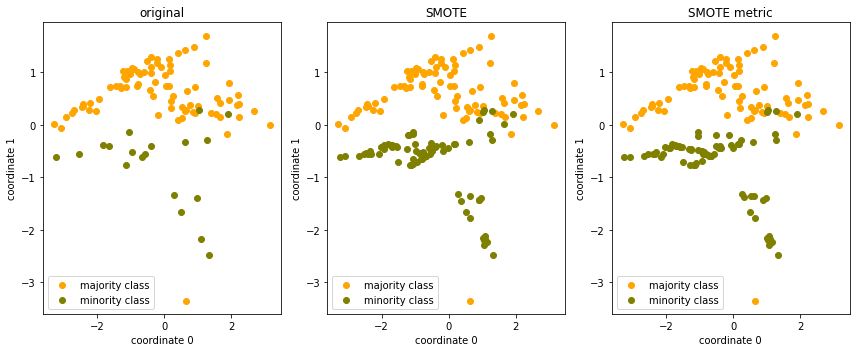

/home/gykovacs/anaconda3/envs/smote_variants/lib/python3.10/site-packages/metric_learn/itml.py:35: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  X = np.vstack({tuple(row) for row in pairs.reshape(-1, pairs.shape[2])})


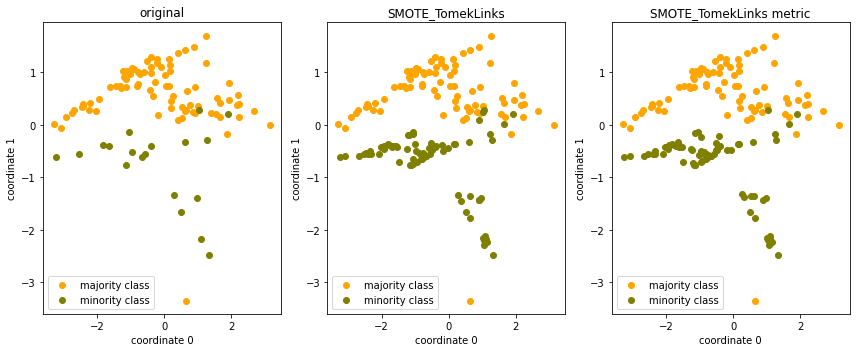

/home/gykovacs/anaconda3/envs/smote_variants/lib/python3.10/site-packages/metric_learn/itml.py:35: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  X = np.vstack({tuple(row) for row in pairs.reshape(-1, pairs.shape[2])})


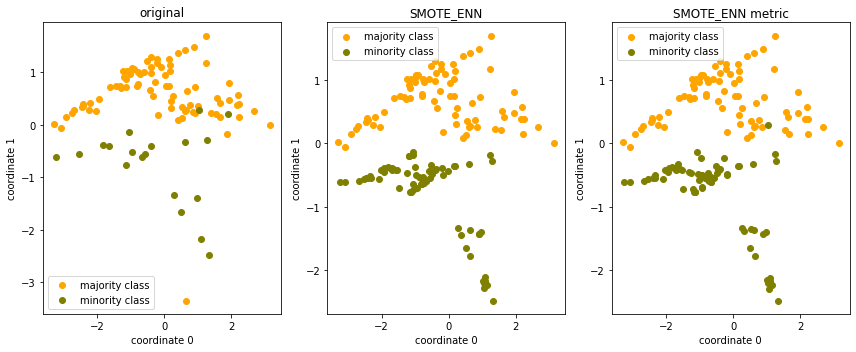

/home/gykovacs/anaconda3/envs/smote_variants/lib/python3.10/site-packages/metric_learn/itml.py:35: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  X = np.vstack({tuple(row) for row in pairs.reshape(-1, pairs.shape[2])})


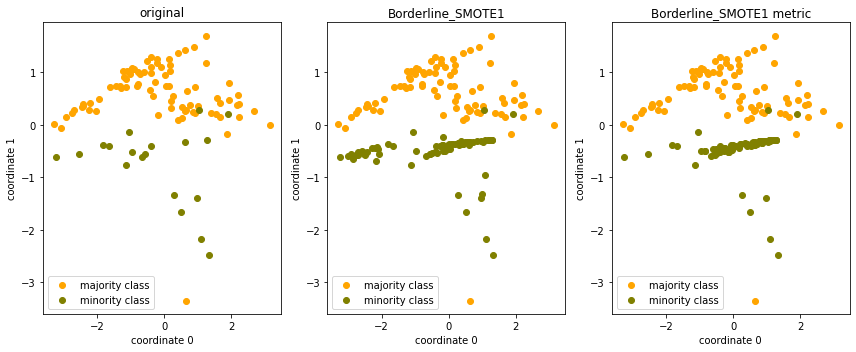

/home/gykovacs/anaconda3/envs/smote_variants/lib/python3.10/site-packages/metric_learn/itml.py:35: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  X = np.vstack({tuple(row) for row in pairs.reshape(-1, pairs.shape[2])})


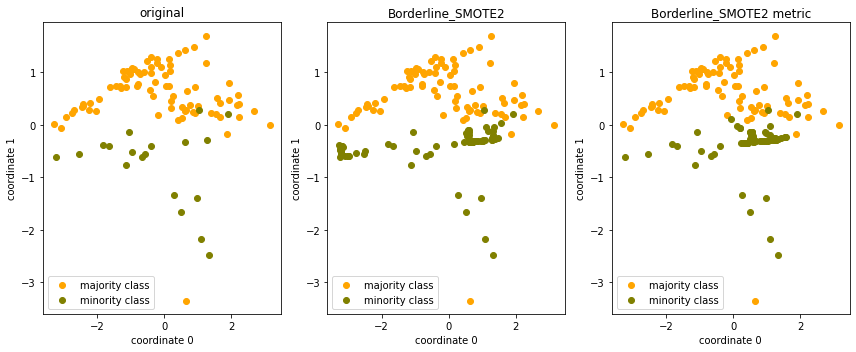

/home/gykovacs/anaconda3/envs/smote_variants/lib/python3.10/site-packages/metric_learn/itml.py:35: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  X = np.vstack({tuple(row) for row in pairs.reshape(-1, pairs.shape[2])})


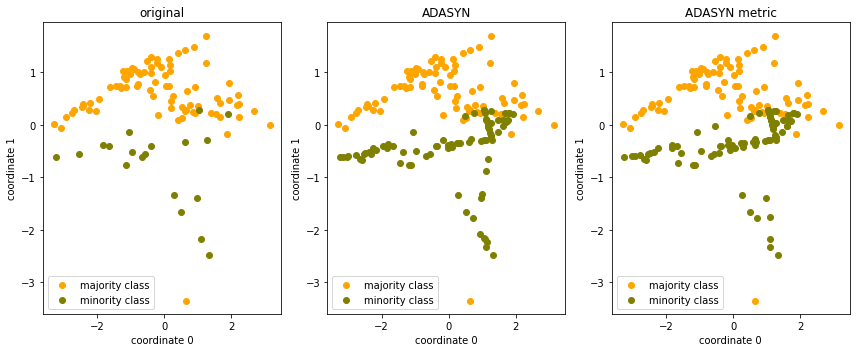

/home/gykovacs/anaconda3/envs/smote_variants/lib/python3.10/site-packages/metric_learn/itml.py:35: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  X = np.vstack({tuple(row) for row in pairs.reshape(-1, pairs.shape[2])})


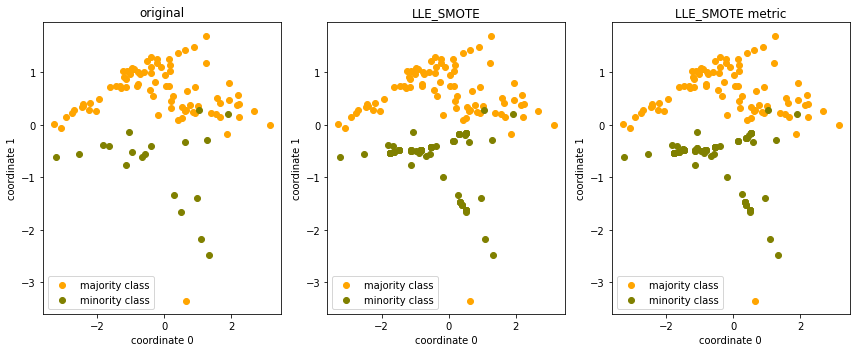

/home/gykovacs/anaconda3/envs/smote_variants/lib/python3.10/site-packages/metric_learn/itml.py:35: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  X = np.vstack({tuple(row) for row in pairs.reshape(-1, pairs.shape[2])})


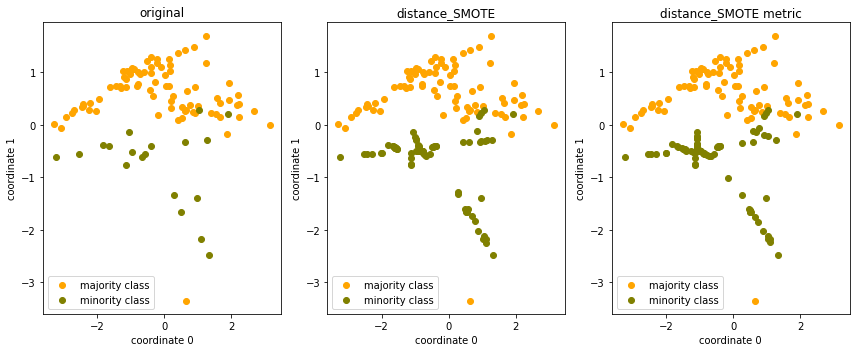

/home/gykovacs/anaconda3/envs/smote_variants/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/gykovacs/anaconda3/envs/smote_variants/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/gykovacs/anaconda3/envs/smote_variants/lib/python3.10/site-packages/metric_learn/itml.py:35: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  X = np.vstack({tuple(row) for row in pairs.reshape(-1, pairs.shape[2])})


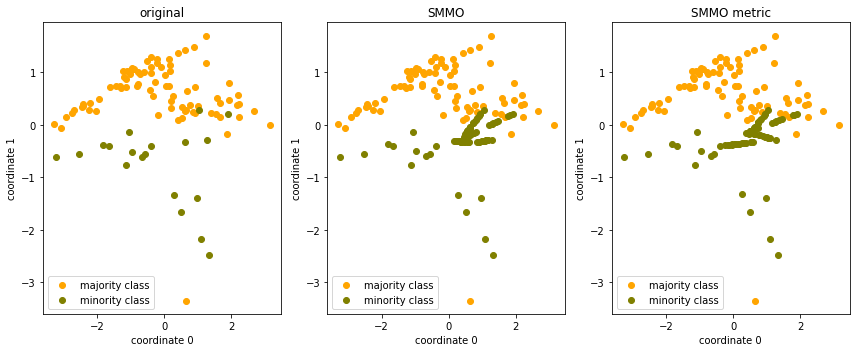

/home/gykovacs/anaconda3/envs/smote_variants/lib/python3.10/site-packages/metric_learn/itml.py:35: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  X = np.vstack({tuple(row) for row in pairs.reshape(-1, pairs.shape[2])})


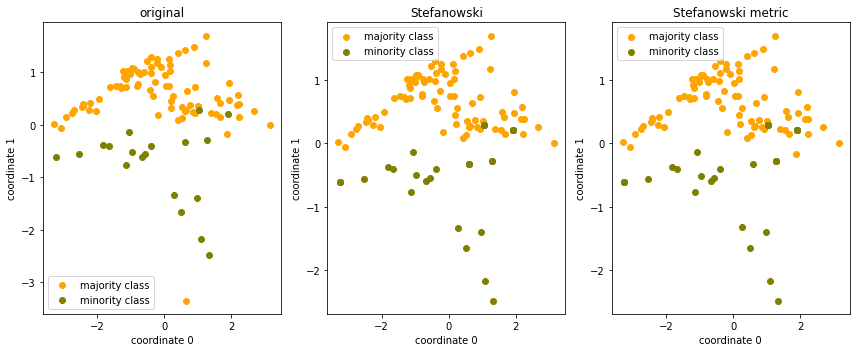

/home/gykovacs/anaconda3/envs/smote_variants/lib/python3.10/site-packages/metric_learn/itml.py:35: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  X = np.vstack({tuple(row) for row in pairs.reshape(-1, pairs.shape[2])})


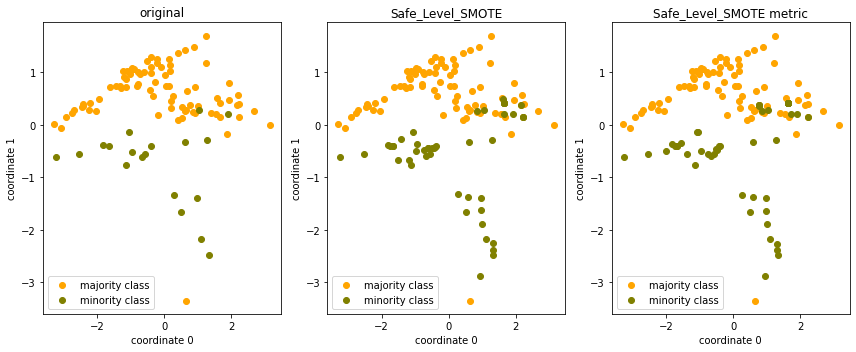

/home/gykovacs/anaconda3/envs/smote_variants/lib/python3.10/site-packages/metric_learn/itml.py:35: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  X = np.vstack({tuple(row) for row in pairs.reshape(-1, pairs.shape[2])})


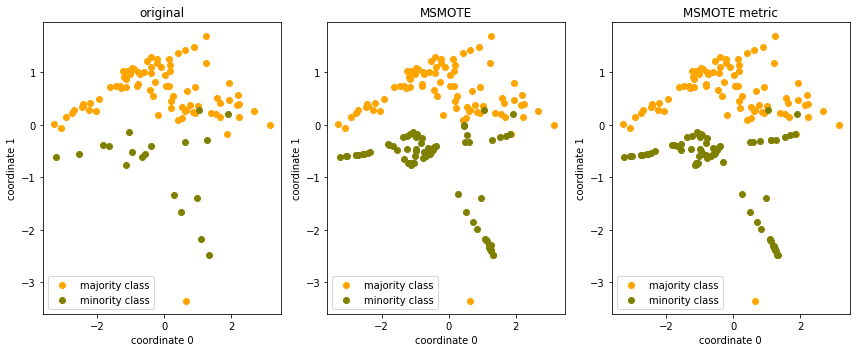

/home/gykovacs/anaconda3/envs/smote_variants/lib/python3.10/site-packages/metric_learn/itml.py:35: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  X = np.vstack({tuple(row) for row in pairs.reshape(-1, pairs.shape[2])})


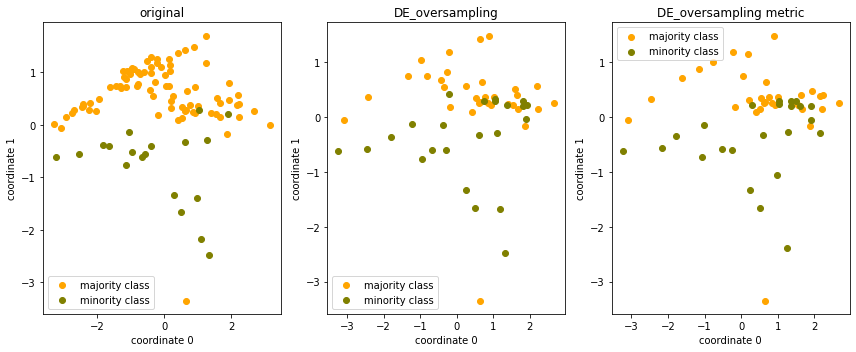

/home/gykovacs/anaconda3/envs/smote_variants/lib/python3.10/site-packages/metric_learn/itml.py:35: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  X = np.vstack({tuple(row) for row in pairs.reshape(-1, pairs.shape[2])})


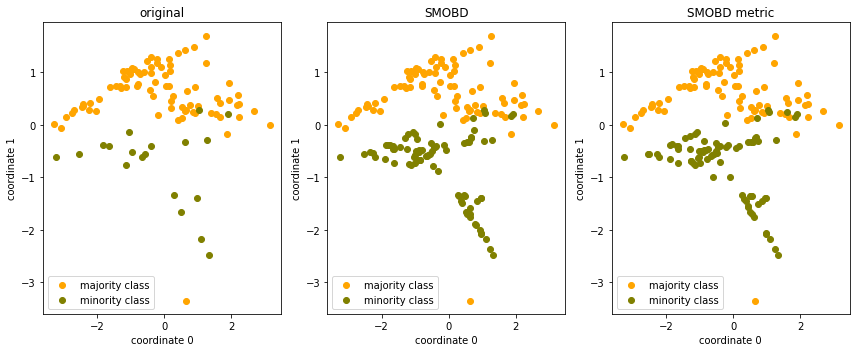

/home/gykovacs/anaconda3/envs/smote_variants/lib/python3.10/site-packages/metric_learn/itml.py:35: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  X = np.vstack({tuple(row) for row in pairs.reshape(-1, pairs.shape[2])})


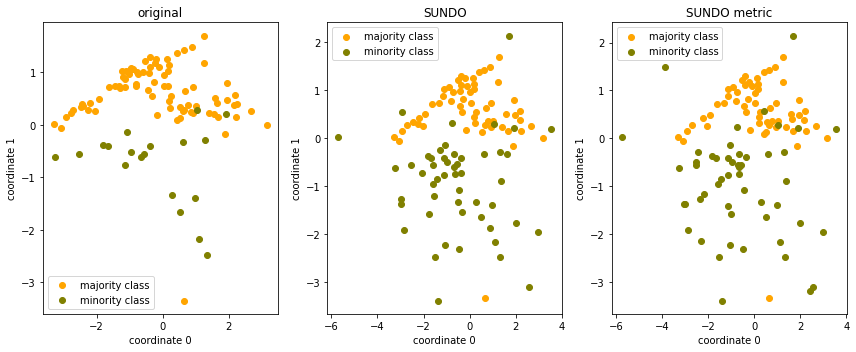

/home/gykovacs/anaconda3/envs/smote_variants/lib/python3.10/site-packages/metric_learn/itml.py:35: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  X = np.vstack({tuple(row) for row in pairs.reshape(-1, pairs.shape[2])})


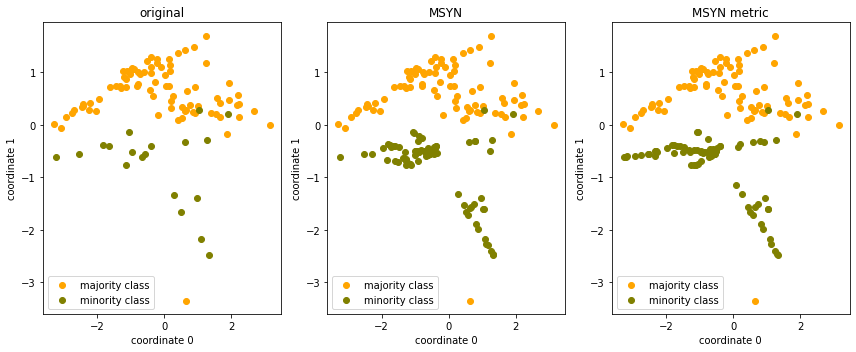

/home/gykovacs/anaconda3/envs/smote_variants/lib/python3.10/site-packages/metric_learn/itml.py:35: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  X = np.vstack({tuple(row) for row in pairs.reshape(-1, pairs.shape[2])})


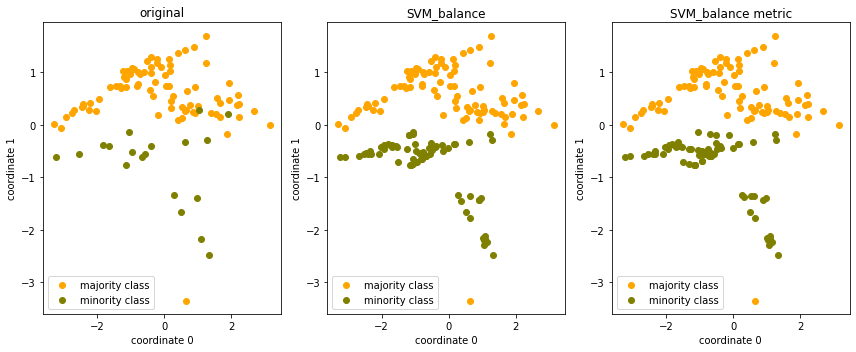

/home/gykovacs/anaconda3/envs/smote_variants/lib/python3.10/site-packages/metric_learn/itml.py:35: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  X = np.vstack({tuple(row) for row in pairs.reshape(-1, pairs.shape[2])})


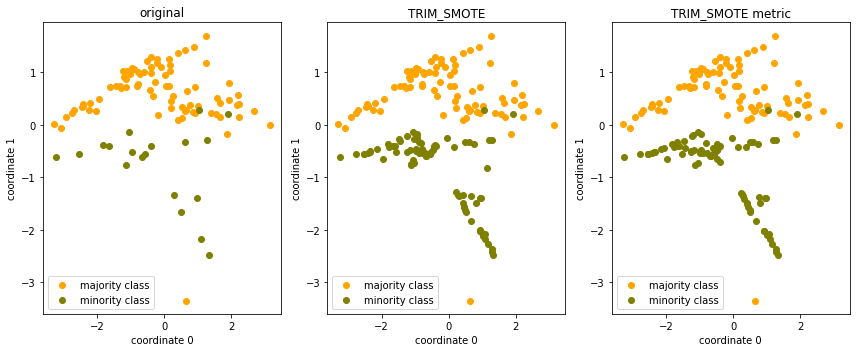

/home/gykovacs/anaconda3/envs/smote_variants/lib/python3.10/site-packages/metric_learn/itml.py:35: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  X = np.vstack({tuple(row) for row in pairs.reshape(-1, pairs.shape[2])})


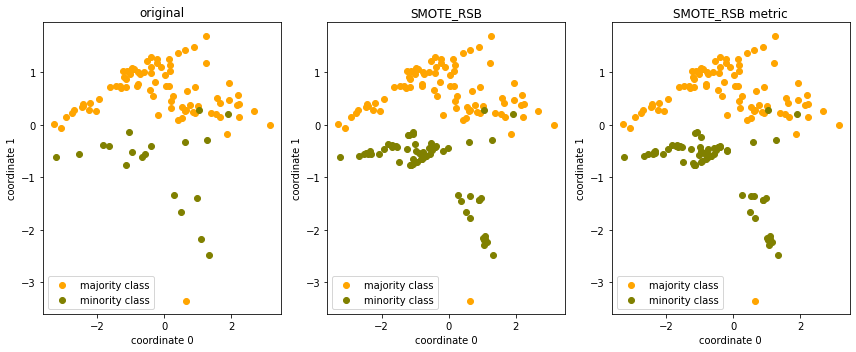

/home/gykovacs/anaconda3/envs/smote_variants/lib/python3.10/site-packages/metric_learn/itml.py:35: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  X = np.vstack({tuple(row) for row in pairs.reshape(-1, pairs.shape[2])})


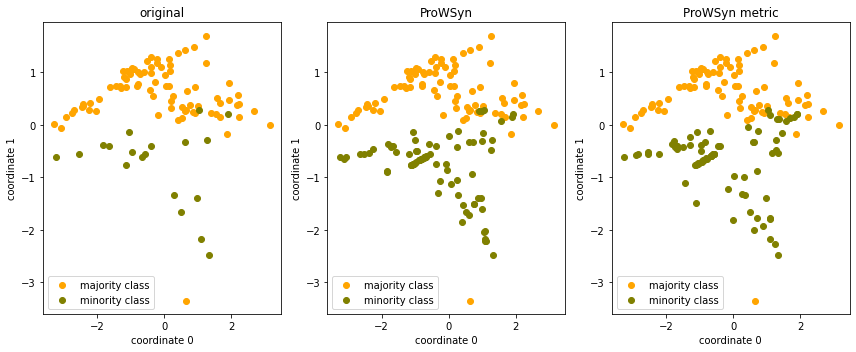

/home/gykovacs/anaconda3/envs/smote_variants/lib/python3.10/site-packages/metric_learn/itml.py:35: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  X = np.vstack({tuple(row) for row in pairs.reshape(-1, pairs.shape[2])})


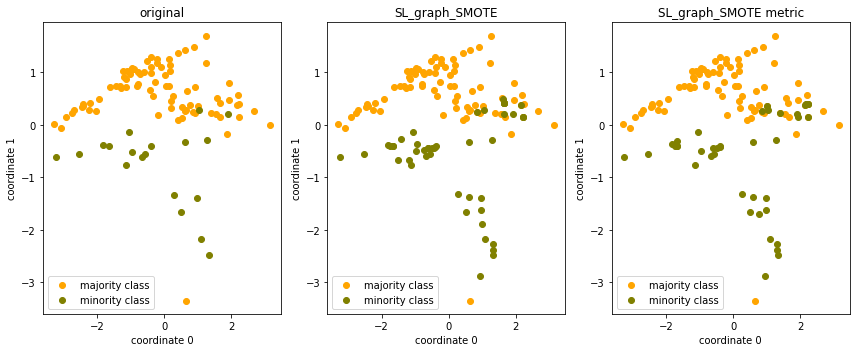

/home/gykovacs/anaconda3/envs/smote_variants/lib/python3.10/site-packages/metric_learn/itml.py:35: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  X = np.vstack({tuple(row) for row in pairs.reshape(-1, pairs.shape[2])})


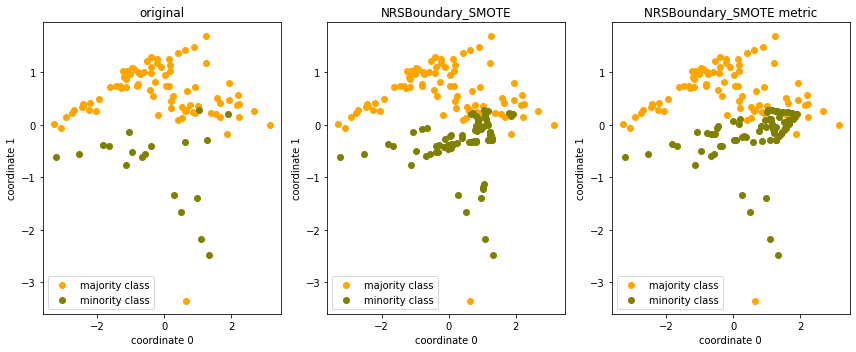

/home/gykovacs/anaconda3/envs/smote_variants/lib/python3.10/site-packages/metric_learn/itml.py:35: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  X = np.vstack({tuple(row) for row in pairs.reshape(-1, pairs.shape[2])})


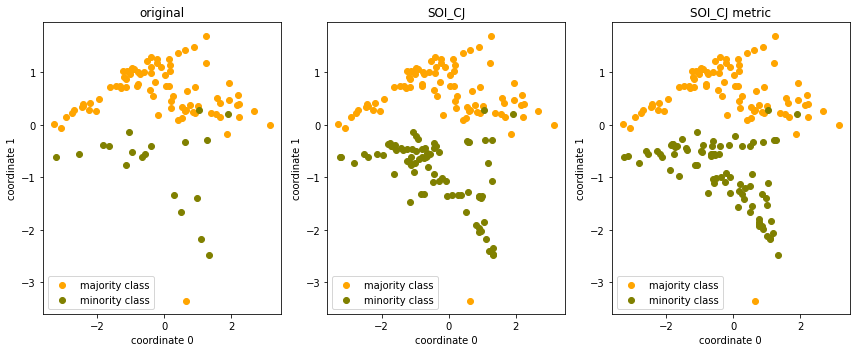

/home/gykovacs/anaconda3/envs/smote_variants/lib/python3.10/site-packages/metric_learn/itml.py:35: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  X = np.vstack({tuple(row) for row in pairs.reshape(-1, pairs.shape[2])})


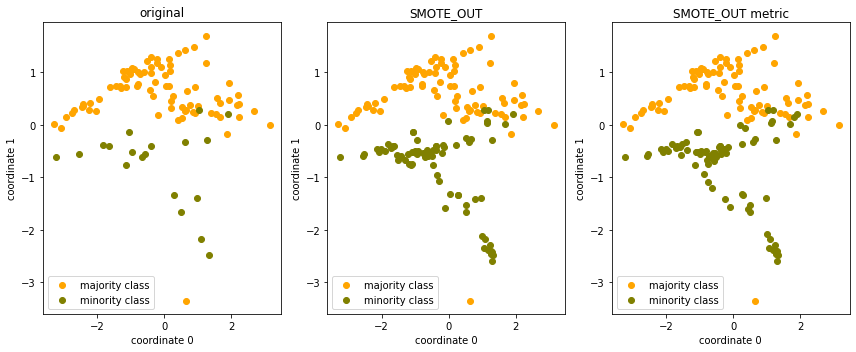

/home/gykovacs/anaconda3/envs/smote_variants/lib/python3.10/site-packages/metric_learn/itml.py:35: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  X = np.vstack({tuple(row) for row in pairs.reshape(-1, pairs.shape[2])})


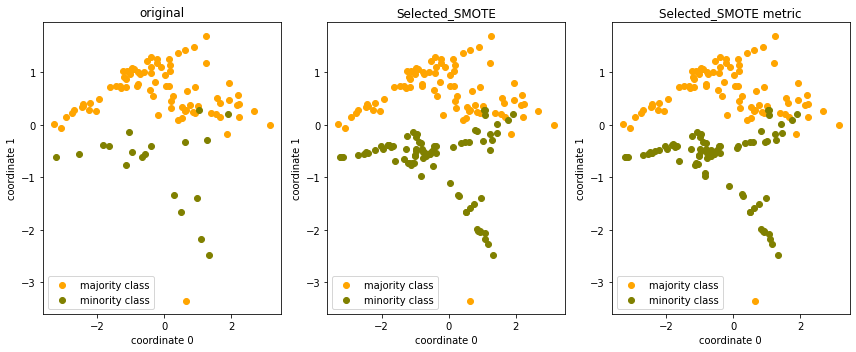

/home/gykovacs/anaconda3/envs/smote_variants/lib/python3.10/site-packages/metric_learn/itml.py:35: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  X = np.vstack({tuple(row) for row in pairs.reshape(-1, pairs.shape[2])})


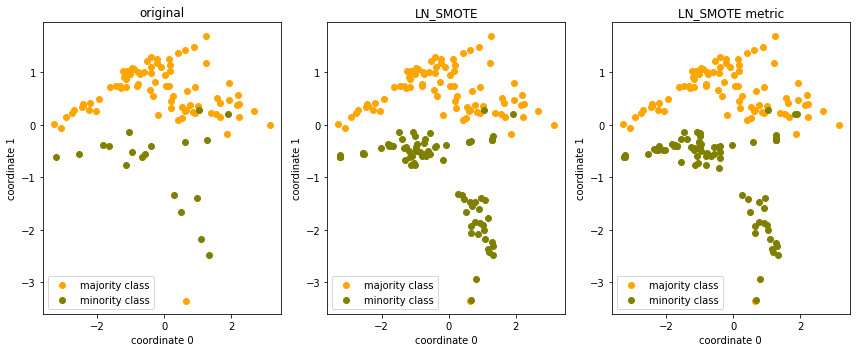

/home/gykovacs/anaconda3/envs/smote_variants/lib/python3.10/site-packages/metric_learn/itml.py:35: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  X = np.vstack({tuple(row) for row in pairs.reshape(-1, pairs.shape[2])})


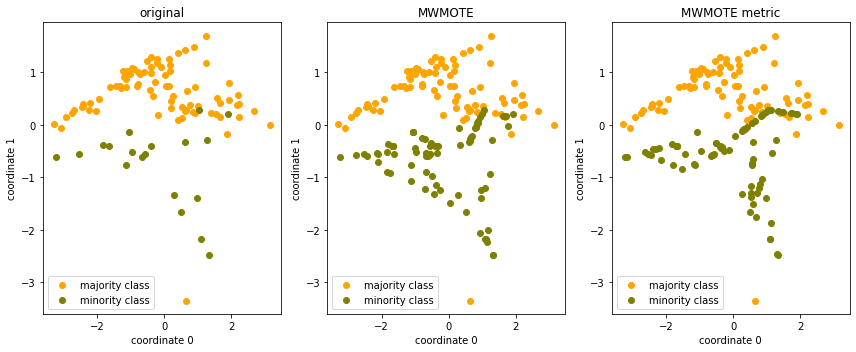

/home/gykovacs/anaconda3/envs/smote_variants/lib/python3.10/site-packages/metric_learn/itml.py:35: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  X = np.vstack({tuple(row) for row in pairs.reshape(-1, pairs.shape[2])})


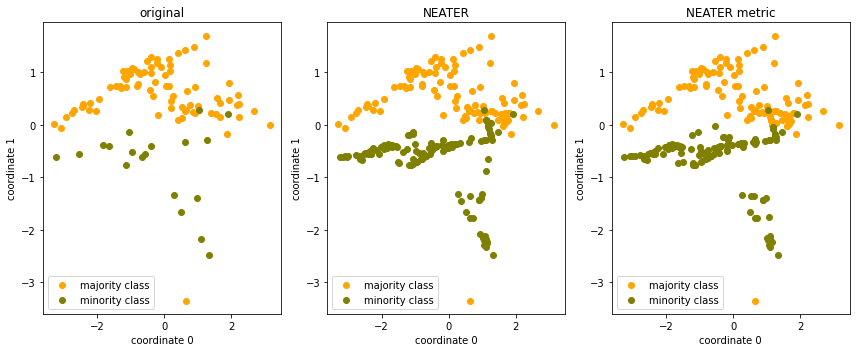

2022-07-05 19:19:04.493310: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-07-05 19:19:04.496805: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-05 19:19:04.496817: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-07-05 19:19:05.675448: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild Tens


2/2 [==============================] - 0s 2ms/step


/home/gykovacs/anaconda3/envs/smote_variants/lib/python3.10/site-packages/metric_learn/itml.py:35: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  X = np.vstack({tuple(row) for row in pairs.reshape(-1, pairs.shape[2])})


2/2 [==============================] - 0s 3ms/step


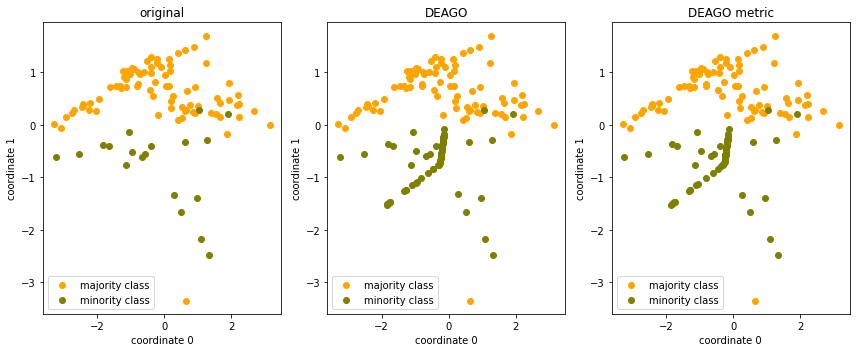

/home/gykovacs/anaconda3/envs/smote_variants/lib/python3.10/site-packages/metric_learn/itml.py:35: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  X = np.vstack({tuple(row) for row in pairs.reshape(-1, pairs.shape[2])})


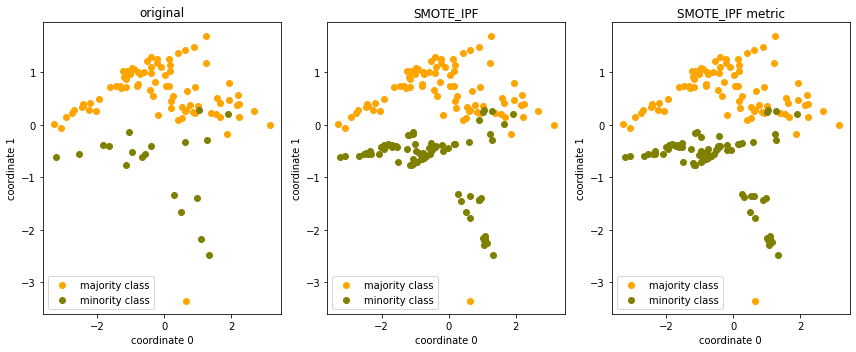

/home/gykovacs/anaconda3/envs/smote_variants/lib/python3.10/site-packages/metric_learn/itml.py:35: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  X = np.vstack({tuple(row) for row in pairs.reshape(-1, pairs.shape[2])})
/home/gykovacs/anaconda3/envs/smote_variants/lib/python3.10/site-packages/metric_learn/itml.py:35: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  X = np.vstack({tuple(row) for row in pairs.reshape(-1, pairs.shape[2])})


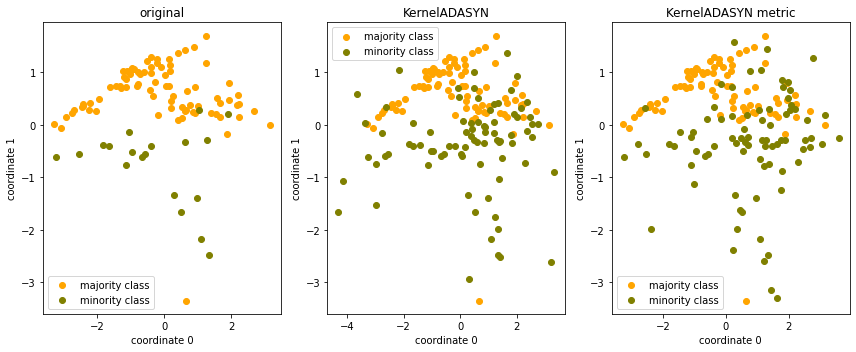

/home/gykovacs/anaconda3/envs/smote_variants/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/gykovacs/anaconda3/envs/smote_variants/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/gykovacs/anaconda3/envs/smote_variants/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/gykovacs/anaconda3/envs/smote_variants/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/gykovacs/anaconda3/envs/smote_variants/lib/python3.10/site-packages/metric_learn/itml.py:35: FutureWarning: arrays to stack must be pass

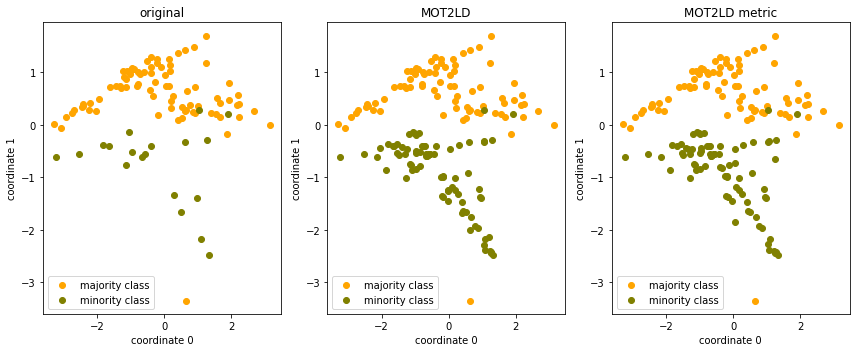

/home/gykovacs/anaconda3/envs/smote_variants/lib/python3.10/site-packages/metric_learn/itml.py:35: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  X = np.vstack({tuple(row) for row in pairs.reshape(-1, pairs.shape[2])})


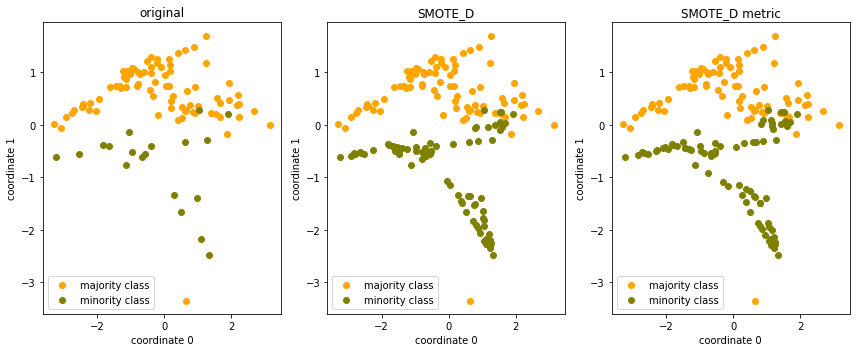

/home/gykovacs/anaconda3/envs/smote_variants/lib/python3.10/site-packages/metric_learn/itml.py:35: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  X = np.vstack({tuple(row) for row in pairs.reshape(-1, pairs.shape[2])})


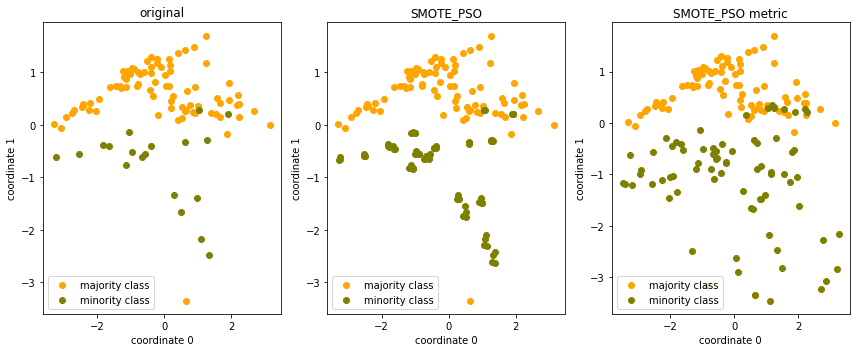

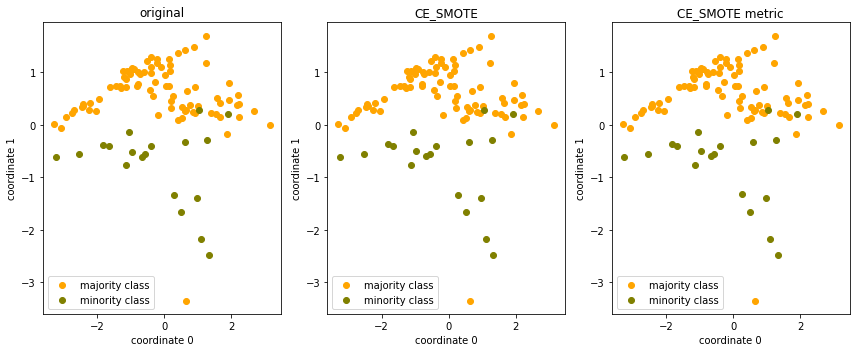

/home/gykovacs/anaconda3/envs/smote_variants/lib/python3.10/site-packages/metric_learn/itml.py:35: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  X = np.vstack({tuple(row) for row in pairs.reshape(-1, pairs.shape[2])})


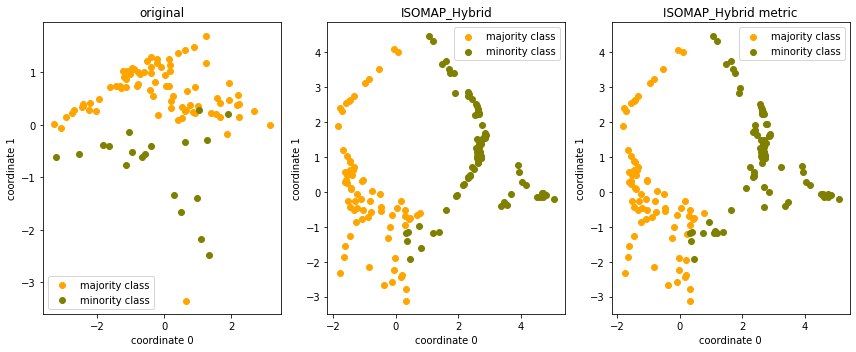

/home/gykovacs/anaconda3/envs/smote_variants/lib/python3.10/site-packages/metric_learn/itml.py:35: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  X = np.vstack({tuple(row) for row in pairs.reshape(-1, pairs.shape[2])})


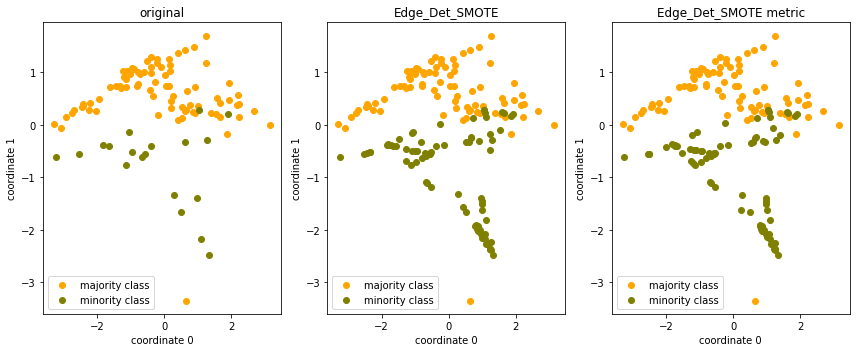

/home/gykovacs/anaconda3/envs/smote_variants/lib/python3.10/site-packages/metric_learn/itml.py:35: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  X = np.vstack({tuple(row) for row in pairs.reshape(-1, pairs.shape[2])})


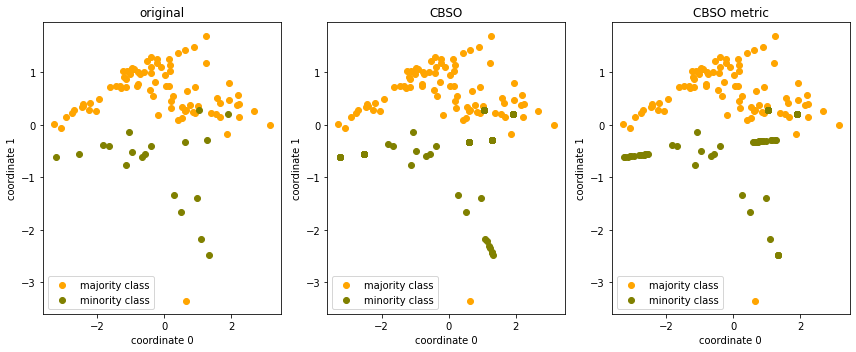

/home/gykovacs/anaconda3/envs/smote_variants/lib/python3.10/site-packages/metric_learn/itml.py:35: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  X = np.vstack({tuple(row) for row in pairs.reshape(-1, pairs.shape[2])})


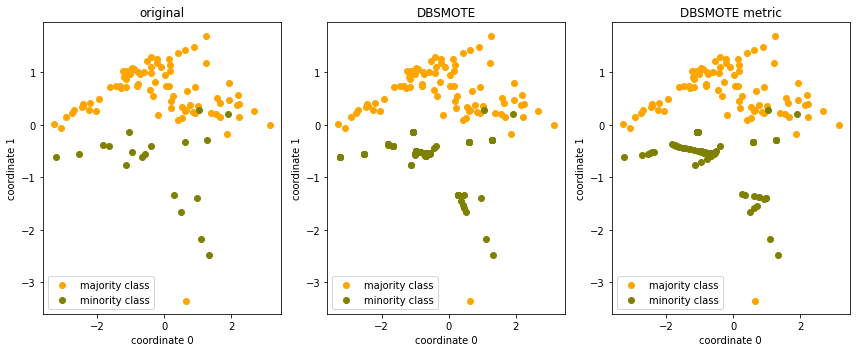

/home/gykovacs/anaconda3/envs/smote_variants/lib/python3.10/site-packages/metric_learn/itml.py:35: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  X = np.vstack({tuple(row) for row in pairs.reshape(-1, pairs.shape[2])})


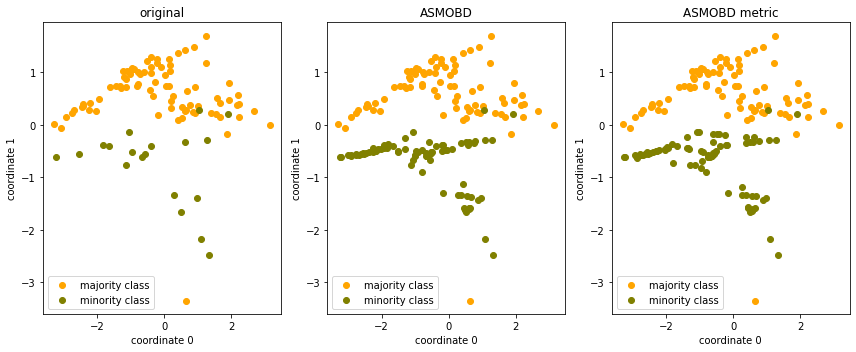

/home/gykovacs/anaconda3/envs/smote_variants/lib/python3.10/site-packages/metric_learn/itml.py:35: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  X = np.vstack({tuple(row) for row in pairs.reshape(-1, pairs.shape[2])})


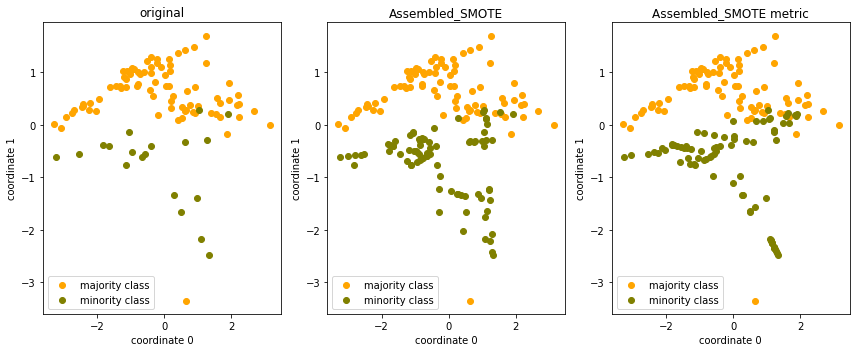

/home/gykovacs/anaconda3/envs/smote_variants/lib/python3.10/site-packages/metric_learn/itml.py:35: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  X = np.vstack({tuple(row) for row in pairs.reshape(-1, pairs.shape[2])})


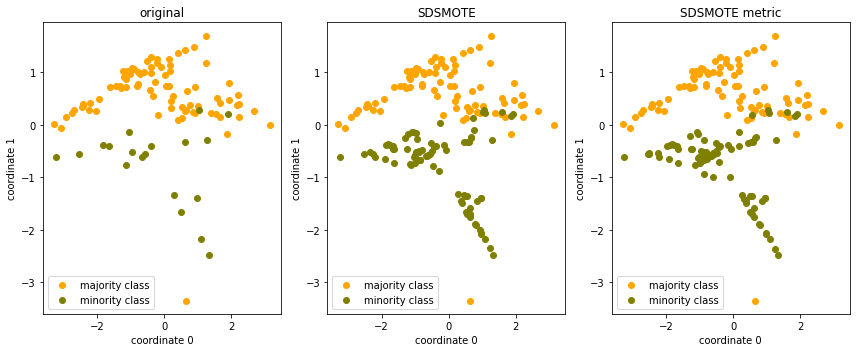

/home/gykovacs/anaconda3/envs/smote_variants/lib/python3.10/site-packages/metric_learn/itml.py:35: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  X = np.vstack({tuple(row) for row in pairs.reshape(-1, pairs.shape[2])})


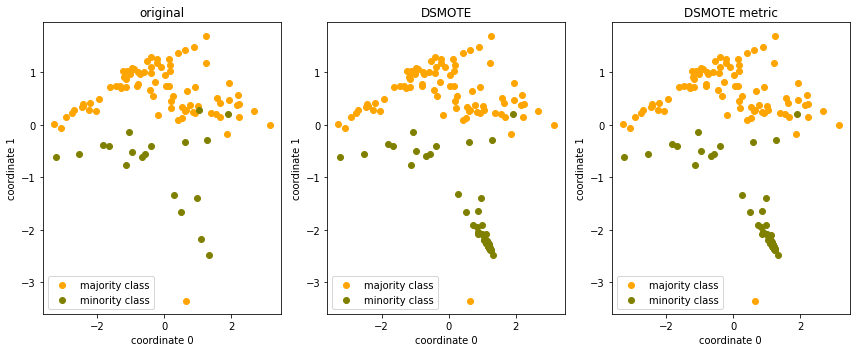

/home/gykovacs/anaconda3/envs/smote_variants/lib/python3.10/site-packages/metric_learn/itml.py:35: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  X = np.vstack({tuple(row) for row in pairs.reshape(-1, pairs.shape[2])})


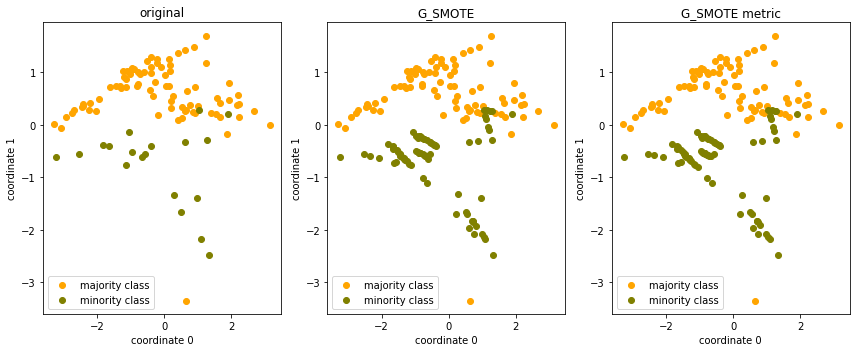

/home/gykovacs/anaconda3/envs/smote_variants/lib/python3.10/site-packages/metric_learn/itml.py:35: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  X = np.vstack({tuple(row) for row in pairs.reshape(-1, pairs.shape[2])})


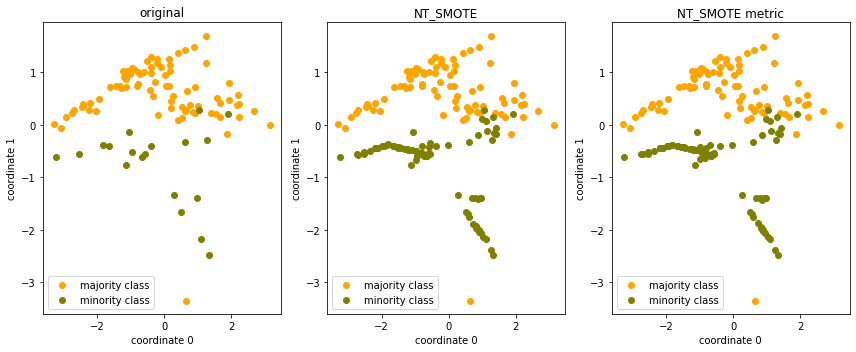

/home/gykovacs/anaconda3/envs/smote_variants/lib/python3.10/site-packages/metric_learn/itml.py:35: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  X = np.vstack({tuple(row) for row in pairs.reshape(-1, pairs.shape[2])})


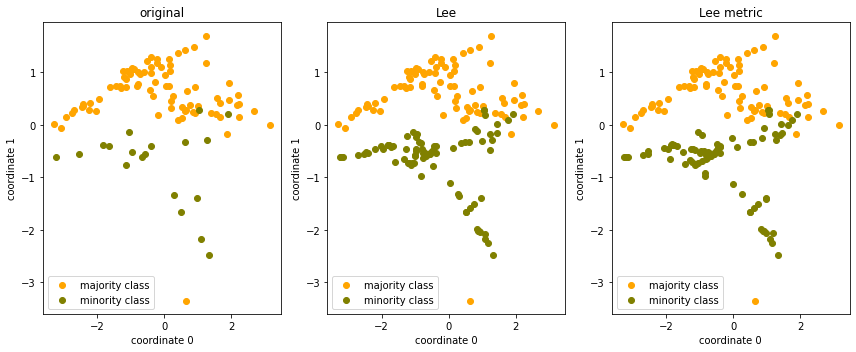

/home/gykovacs/anaconda3/envs/smote_variants/lib/python3.10/site-packages/metric_learn/itml.py:35: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  X = np.vstack({tuple(row) for row in pairs.reshape(-1, pairs.shape[2])})


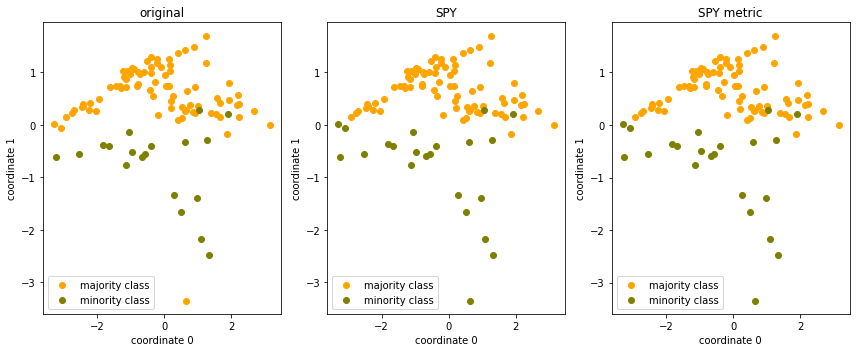

/home/gykovacs/anaconda3/envs/smote_variants/lib/python3.10/site-packages/metric_learn/itml.py:35: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  X = np.vstack({tuple(row) for row in pairs.reshape(-1, pairs.shape[2])})


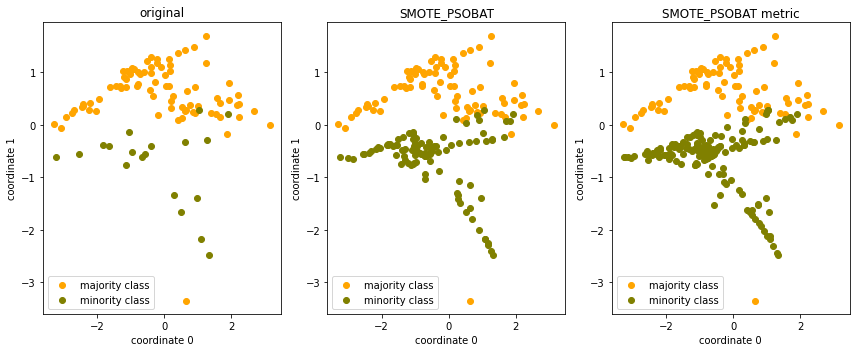

/home/gykovacs/anaconda3/envs/smote_variants/lib/python3.10/site-packages/metric_learn/itml.py:35: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  X = np.vstack({tuple(row) for row in pairs.reshape(-1, pairs.shape[2])})


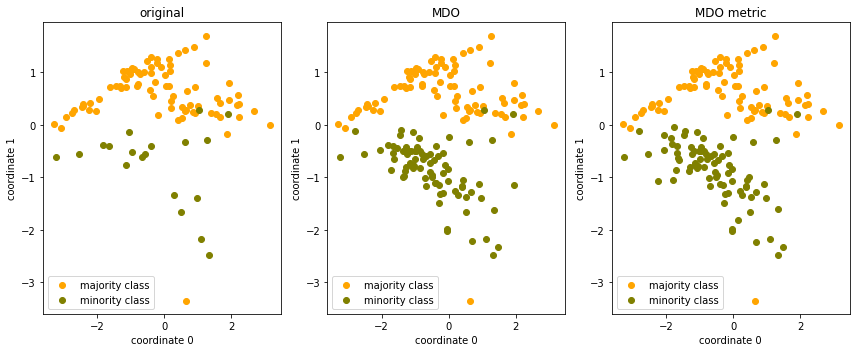

/home/gykovacs/anaconda3/envs/smote_variants/lib/python3.10/site-packages/metric_learn/itml.py:35: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  X = np.vstack({tuple(row) for row in pairs.reshape(-1, pairs.shape[2])})


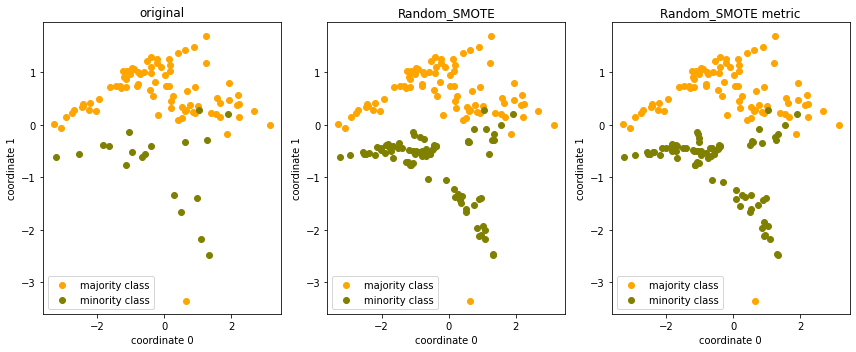

/home/gykovacs/anaconda3/envs/smote_variants/lib/python3.10/site-packages/metric_learn/itml.py:35: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  X = np.vstack({tuple(row) for row in pairs.reshape(-1, pairs.shape[2])})


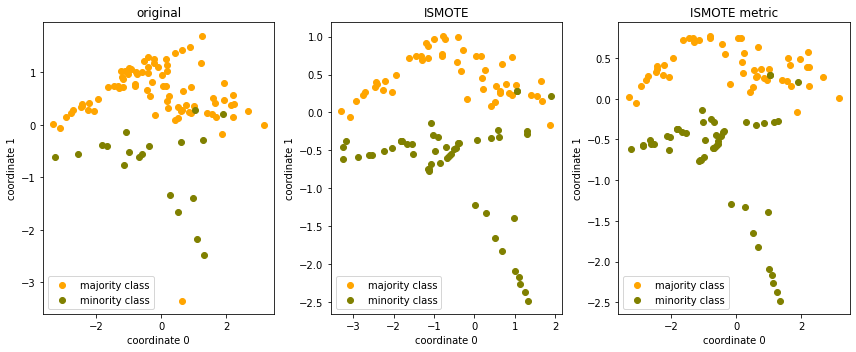

/home/gykovacs/anaconda3/envs/smote_variants/lib/python3.10/site-packages/metric_learn/itml.py:35: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  X = np.vstack({tuple(row) for row in pairs.reshape(-1, pairs.shape[2])})


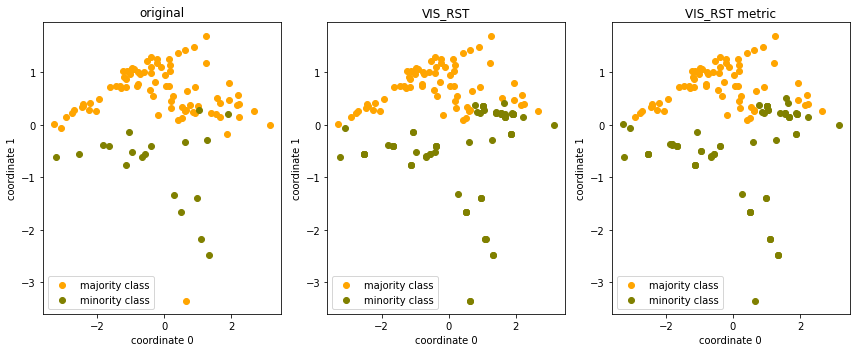

/home/gykovacs/anaconda3/envs/smote_variants/lib/python3.10/site-packages/metric_learn/itml.py:35: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  X = np.vstack({tuple(row) for row in pairs.reshape(-1, pairs.shape[2])})


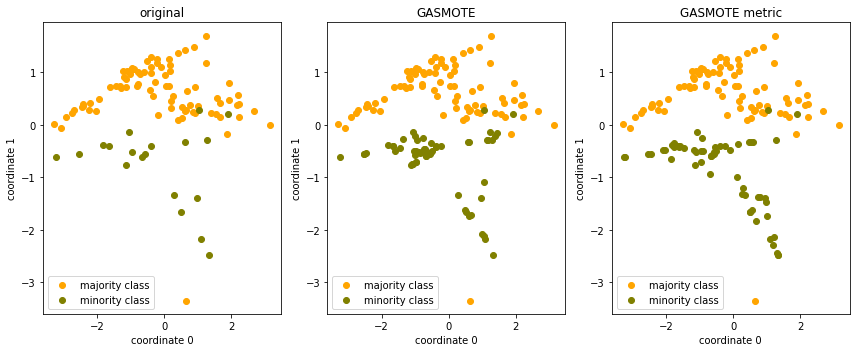

/home/gykovacs/anaconda3/envs/smote_variants/lib/python3.10/site-packages/metric_learn/itml.py:35: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  X = np.vstack({tuple(row) for row in pairs.reshape(-1, pairs.shape[2])})


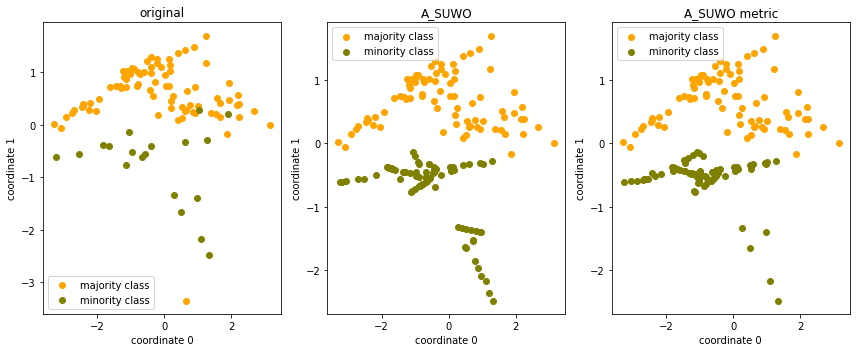

/home/gykovacs/anaconda3/envs/smote_variants/lib/python3.10/site-packages/metric_learn/itml.py:35: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  X = np.vstack({tuple(row) for row in pairs.reshape(-1, pairs.shape[2])})


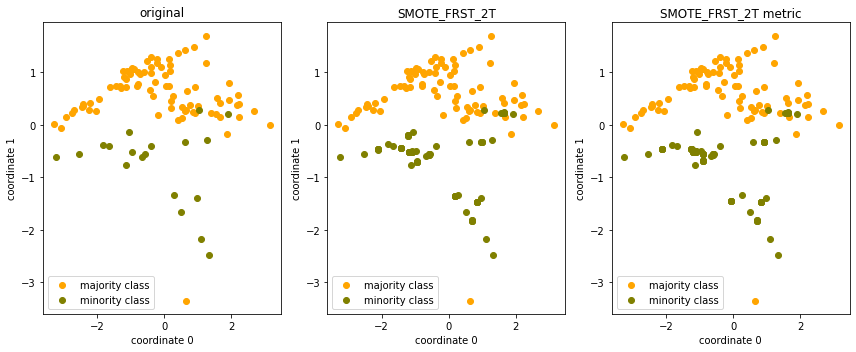

/home/gykovacs/anaconda3/envs/smote_variants/lib/python3.10/site-packages/metric_learn/itml.py:35: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  X = np.vstack({tuple(row) for row in pairs.reshape(-1, pairs.shape[2])})


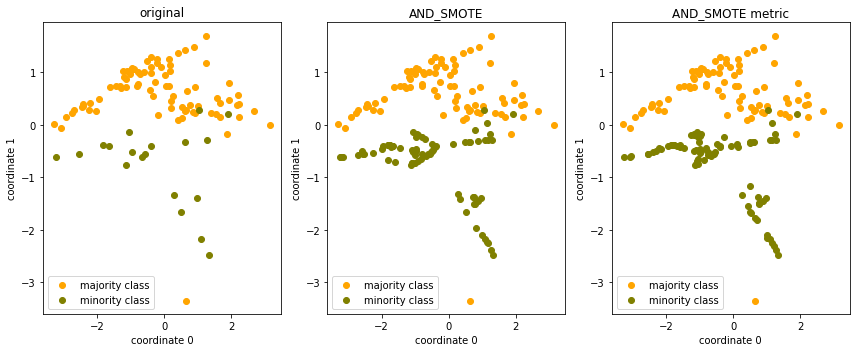

(100, 4) (19, 4)


/home/gykovacs/anaconda3/envs/smote_variants/lib/python3.10/site-packages/metric_learn/itml.py:35: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  X = np.vstack({tuple(row) for row in pairs.reshape(-1, pairs.shape[2])})


(100, 4) (19, 4)


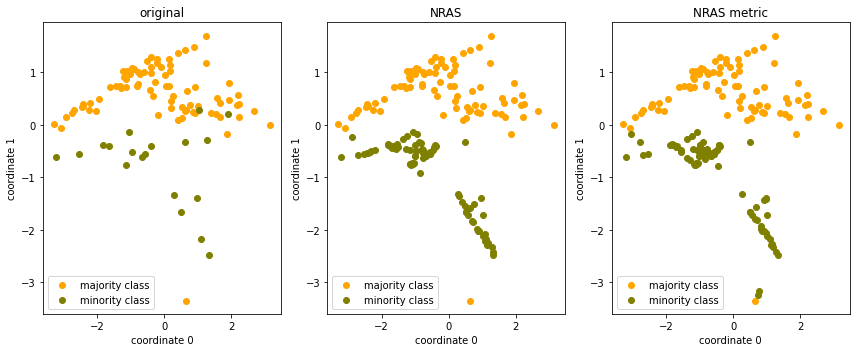

/home/gykovacs/anaconda3/envs/smote_variants/lib/python3.10/site-packages/metric_learn/itml.py:35: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  X = np.vstack({tuple(row) for row in pairs.reshape(-1, pairs.shape[2])})


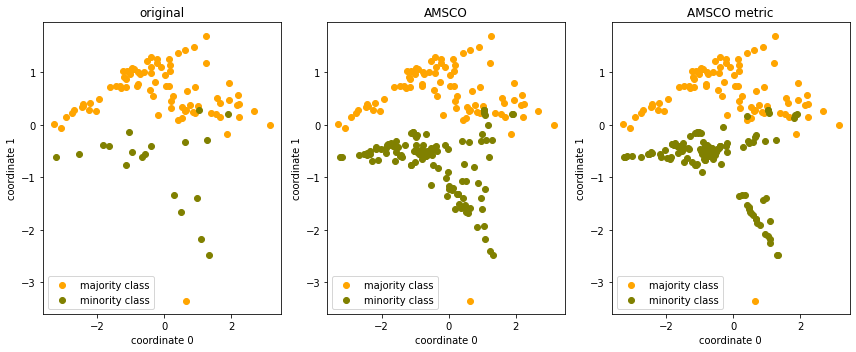

/home/gykovacs/anaconda3/envs/smote_variants/lib/python3.10/site-packages/metric_learn/itml.py:35: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  X = np.vstack({tuple(row) for row in pairs.reshape(-1, pairs.shape[2])})


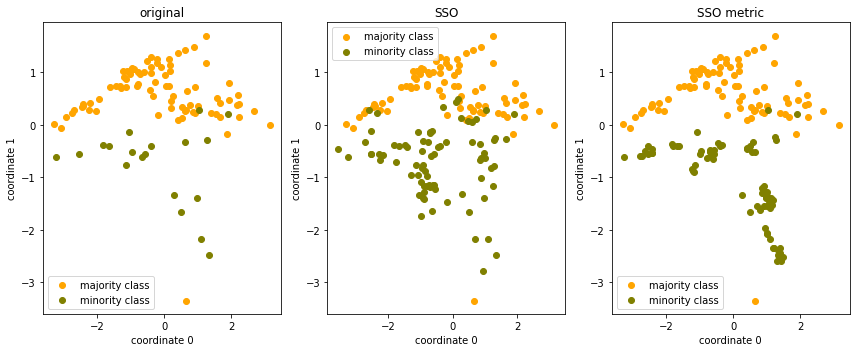

/home/gykovacs/anaconda3/envs/smote_variants/lib/python3.10/site-packages/metric_learn/itml.py:35: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  X = np.vstack({tuple(row) for row in pairs.reshape(-1, pairs.shape[2])})


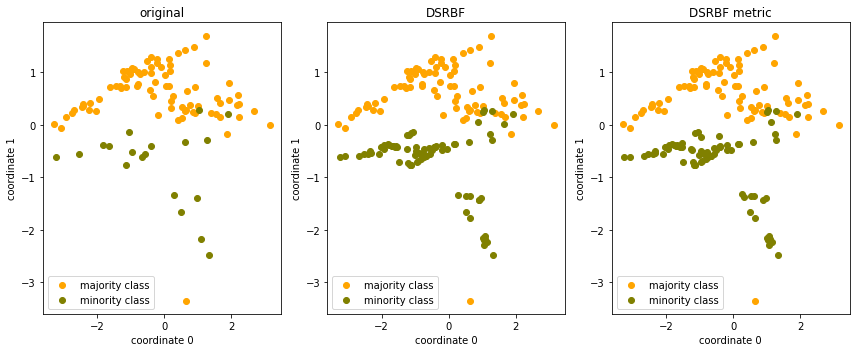

/home/gykovacs/anaconda3/envs/smote_variants/lib/python3.10/site-packages/metric_learn/itml.py:35: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  X = np.vstack({tuple(row) for row in pairs.reshape(-1, pairs.shape[2])})


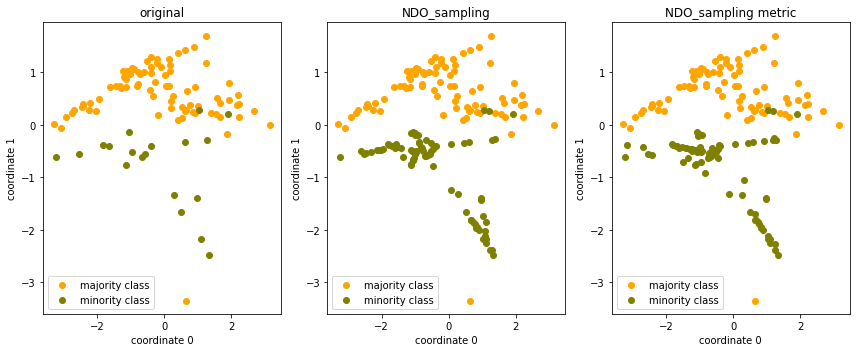

/home/gykovacs/anaconda3/envs/smote_variants/lib/python3.10/site-packages/metric_learn/itml.py:35: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  X = np.vstack({tuple(row) for row in pairs.reshape(-1, pairs.shape[2])})


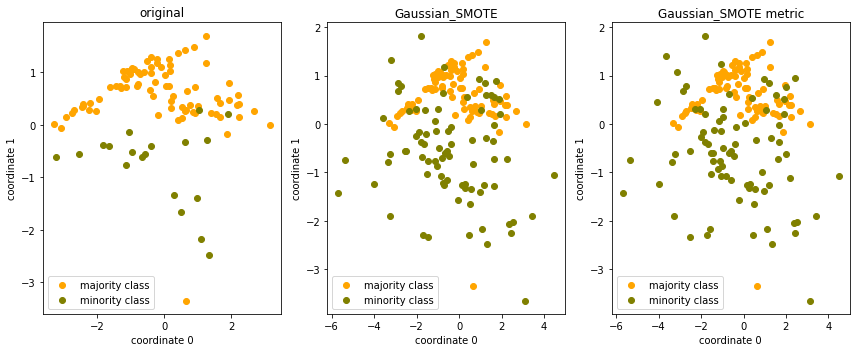

/home/gykovacs/anaconda3/envs/smote_variants/lib/python3.10/site-packages/metric_learn/itml.py:35: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  X = np.vstack({tuple(row) for row in pairs.reshape(-1, pairs.shape[2])})


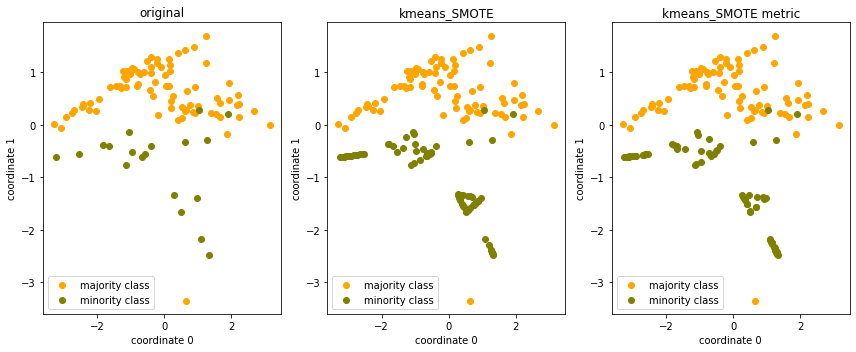

/home/gykovacs/anaconda3/envs/smote_variants/lib/python3.10/site-packages/metric_learn/itml.py:35: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  X = np.vstack({tuple(row) for row in pairs.reshape(-1, pairs.shape[2])})


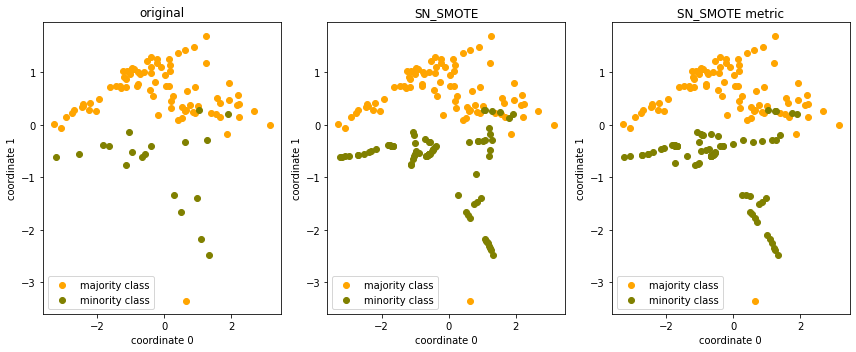

/home/gykovacs/anaconda3/envs/smote_variants/lib/python3.10/site-packages/metric_learn/itml.py:35: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  X = np.vstack({tuple(row) for row in pairs.reshape(-1, pairs.shape[2])})


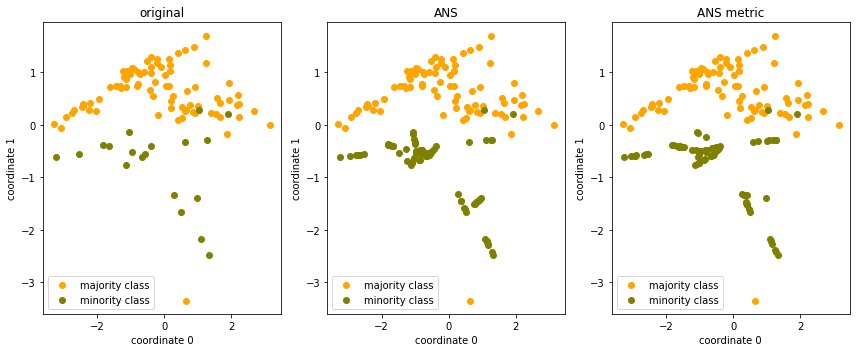

/home/gykovacs/anaconda3/envs/smote_variants/lib/python3.10/site-packages/metric_learn/itml.py:35: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  X = np.vstack({tuple(row) for row in pairs.reshape(-1, pairs.shape[2])})


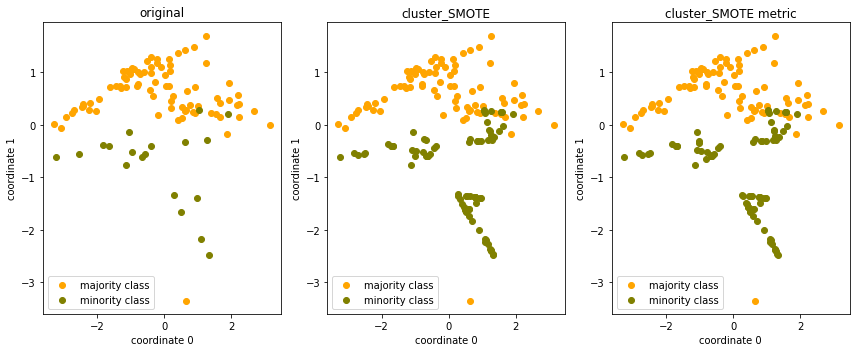

/home/gykovacs/anaconda3/envs/smote_variants/lib/python3.10/site-packages/metric_learn/itml.py:35: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  X = np.vstack({tuple(row) for row in pairs.reshape(-1, pairs.shape[2])})


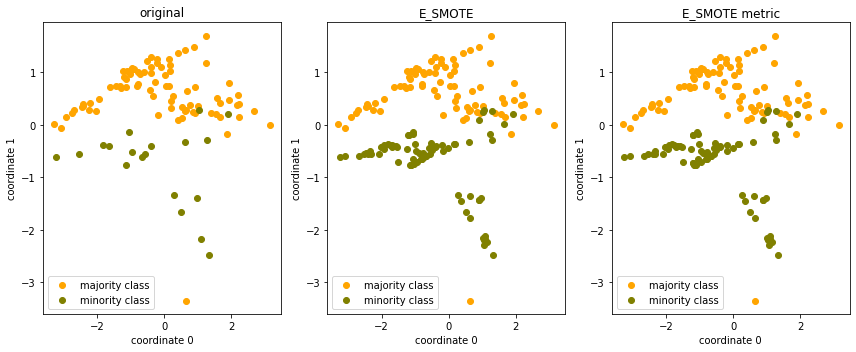

/home/gykovacs/anaconda3/envs/smote_variants/lib/python3.10/site-packages/metric_learn/itml.py:35: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  X = np.vstack({tuple(row) for row in pairs.reshape(-1, pairs.shape[2])})


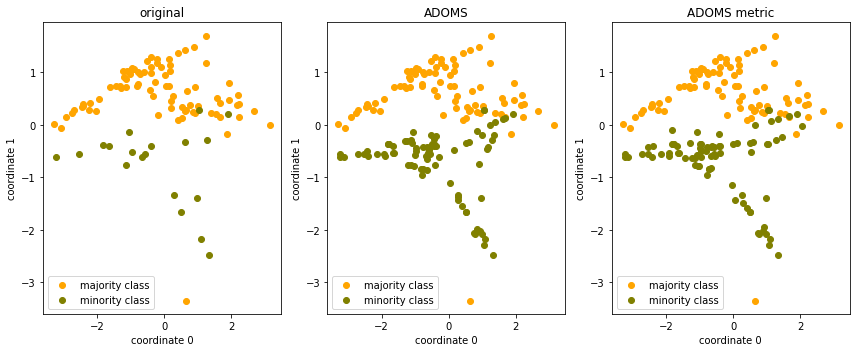

In [11]:
for o in oversamplers_metric:
    oversampler_vanilla= o(random_state=21)
    X_samp, y_samp= oversampler_vanilla.sample(X, y)

    oversampler_metric= o(random_state=21, nn_params={'metric': 'precomputed',
                                                        'metric_learning': 'ITML'})
    X_samp_metric, y_samp_metric= oversampler_metric.sample(X, y)
    
    n_1 = np.sum(y_samp == 1)
    range_1 = np.min(X_samp[:,1]), np.max(X_samp[:,1])
    noise_10 = np.random.rand(n_1) * (range_1[1] - range_1[0])/1000
    noise_11 = np.random.rand(n_1) * (range_1[1] - range_1[0])/1000

    n_1_metric = np.sum(y_samp_metric == 1)
    range_1_metric = np.min(X_samp_metric[:,1]), np.max(X_samp_metric[:,1])
    noise_10_metric = np.random.rand(n_1_metric) * (range_1_metric[1] - range_1_metric[0])/1000
    noise_11_metric = np.random.rand(n_1_metric) * (range_1_metric[1] - range_1_metric[0])/1000

    plt.figure(figsize=(12, 5))
    ax= plt.subplot(131)
    plt.scatter(X[y == 0][:,0], X[y == 0][:,1], label='majority class', c='orange', marker='o')
    plt.scatter(X[y == 1][:,0], X[y == 1][:,1], label='minority class', c='olive', marker='o')
    plt.title('original')
    plt.xlabel('coordinate 0')
    plt.ylabel('coordinate 1')
    plt.tight_layout()
    plt.legend()
    
    ax= plt.subplot(132)
    plt.scatter(X_samp[y_samp == 0][:,0], X_samp[y_samp == 0][:,1], label='majority class', c='orange', marker='o')
    plt.scatter(X_samp[y_samp == 1][:,0] + noise_10, X_samp[y_samp == 1][:,1] + noise_11, label='minority class', c='olive', marker='o')
    plt.title(oversampler_vanilla.__class__.__name__)
    plt.xlabel('coordinate 0')
    plt.ylabel('coordinate 1')
    plt.tight_layout()
    plt.legend()

    ax= plt.subplot(133)
    plt.scatter(X_samp_metric[y_samp_metric == 0][:,0], X_samp_metric[y_samp_metric == 0][:,1], label='majority class', c='orange', marker='o')
    plt.scatter(X_samp_metric[y_samp_metric == 1][:,0] + noise_10_metric, X_samp_metric[y_samp_metric == 1][:,1] + noise_11_metric, label='minority class', c='olive', marker='o')
    plt.title(oversampler_metric.__class__.__name__ + ' metric')
    plt.xlabel('coordinate 0')
    plt.ylabel('coordinate 1')
    plt.tight_layout()
    plt.legend()

    plt.show()